In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
start='2015-01-01'
end='2022-01-01'

df=data.DataReader('AAPL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678253
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983021
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985285
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321600
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.256104


In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.712143
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.083878


In [13]:
df=df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678253
1,1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983021
2,2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985285
3,3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321600
4,4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.256104


In [14]:
df=df.drop(['index','Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,27.860001,26.837500,27.847500,27.332500,212818400.0
1,27.162500,26.352501,27.072500,26.562500,257142000.0
2,26.857500,26.157499,26.635000,26.565001,263188400.0
3,27.049999,26.674999,26.799999,26.937500,160423600.0
4,28.037500,27.174999,27.307501,27.972500,237458000.0


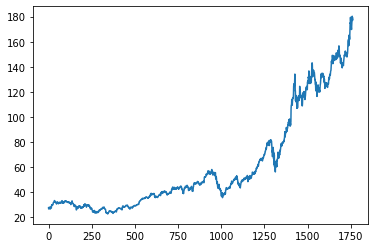

In [15]:
plt.plot(df.Close)

In [16]:
df

,High,Low,Open,Close,Volume
0,27.860001,26.837500,27.847500,27.332500,212818400.0
1,27.162500,26.352501,27.072500,26.562500,257142000.0
2,26.857500,26.157499,26.635000,26.565001,263188400.0
3,27.049999,26.674999,26.799999,26.937500,160423600.0
4,28.037500,27.174999,27.307501,27.972500,237458000.0
...,...,...,...,...,...
1758,180.419998,177.070007,177.089996,180.330002,74919600.0
1759,181.330002,178.529999,180.160004,179.289993,79144300.0
1760,180.630005,178.139999,179.330002,179.380005,62348900.0
1761,180.570007,178.089996,179.470001,178.199997,59773000.0


In [17]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1758    153.3444
1759    153.6667
1760    153.9991
1761    154.3202
1762    154.6399
Name: Close, Length: 1763, dtype: float64

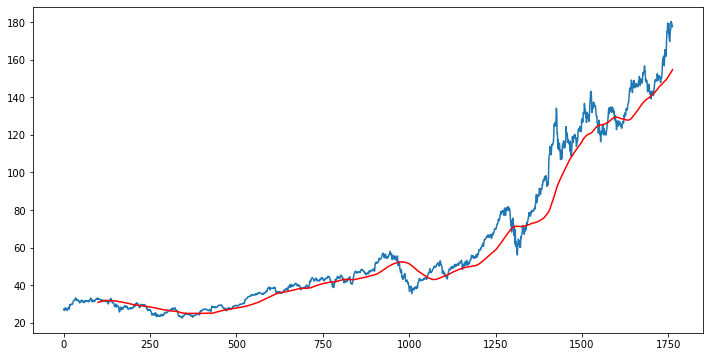

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [19]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1758    142.85570
1759    143.13220
1760    143.40125
1761    143.66845
1762    143.95365
Name: Close, Length: 1763, dtype: float64

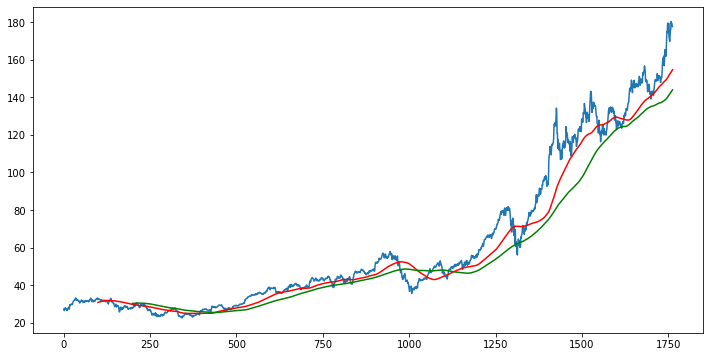

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [23]:
df.shape

(1763, 5)

In [25]:
#spliting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1234, 1)
(529, 1)


In [26]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [27]:
data_testing.head()

,Close
1234,66.072502
1235,66.959999
1236,66.812500
1237,66.040001
1238,64.862503


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.10743383],
       [0.09000907],
       [0.09006565],
       ...,
       [0.97120391],
       [0.96990265],
       [0.99587004]])

In [30]:
data_training_array.shape

(1234, 1)

In [55]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)


(1134, 100, 1)
(1134,)


In [ ]:
#ML Model


In [41]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:
x_train.shape

(1134, 100, 1)

In [43]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
36/36 [==============================] - 26s 377ms/step - loss: 0.0521
Epoch 2/50
36/36 [==============================] - 14s 379ms/step - loss: 0.0124
Epoch 3/50
36/36 [==============================] - 14s 376ms/step - loss: 0.0093
Epoch 4/50
36/36 [==============================] - 13s 352ms/step - loss: 0.0095
Epoch 5/50
36/36 [==============================] - 12s 323ms/step - loss: 0.0081
Epoch 6/50
36/36 [==============================] - 12s 323ms/step - loss: 0.0073
Epoch 7/50
36/36 [==============================] - 12s 335ms/step - loss: 0.0064
Epoch 8/50
36/36 [==============================] - 13s 367ms/step - loss: 0.0070
Epoch 9/50
36/36 [==============================] - 15s 416ms/step - loss: 0.0064
Epoch 10/50
36/36 [==============================] - 14s 390ms/step - loss: 0.0061
Epoch 11/50
36/36 [==============================] - 13s 353ms/step - loss: 0.0063
Epoch 12/50
36/36 [==============================] - 13s 365ms/step - loss: 0.0054
Epoch 13/50
3

In [67]:
model.save('keras_model.h5')

In [47]:
data_testing.head()

,Close
1234,66.072502
1235,66.959999
1236,66.812500
1237,66.040001
1238,64.862503


In [48]:
past_100_days=data_training.tail(100)

In [49]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1972\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [50]:
final_df.head()

,Close
0,50.005001
1,50.310001
2,50.807499
3,50.437500
4,50.825001


In [51]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01265201],
       [0.01496271],
       [0.01873177],
       [0.01592864],
       [0.01886436],
       [0.02248193],
       [0.02113717],
       [0.01895907],
       [0.02333423],
       [0.0175196 ],
       [0.02628888],
       [0.02935717],
       [0.02903519],
       [0.02591009],
       [0.02727378],
       [0.03094813],
       [0.02924354],
       [0.03731201],
       [0.02858062],
       [0.02022805],
       [0.        ],
       [0.00693209],
       [0.01079586],
       [0.01911057],
       [0.0144892 ],
       [0.01352324],
       [0.0296034 ],
       [0.01782265],
       [0.01590971],
       [0.02492519],
       [0.03221715],
       [0.03223608],
       [0.03655442],
       [0.03621351],
       [0.01761431],
       [0.02490626],
       [0.02049321],
       [0.023088  ],
       [0.02967915],
       [0.02916779],
       [0.02340998],
       [0.03002009],
       [0.03776659],
       [0.0377287 ],
       [0.03945225],
       [0.0442441 ],
       [0.05729384],
       [0.056

In [52]:
input_data.shape

(629, 1)

In [58]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(529, 100, 1)
(529,)


In [60]:
#Making Predictions

y_predicted=model.predict(x_test)

17/17 [==============================] - 4s 150ms/step


In [61]:
y_predicted.shape

(529, 1)

In [62]:
y_test

array([0.13438011, 0.14110383, 0.13998637, 0.13413388, 0.1252131 ,
       0.12955035, 0.13682334, 0.14653963, 0.13936137, 0.14231602,
       0.14665327, 0.14796014, 0.15494904, 0.16386982, 0.16491156,
       0.16364255, 0.16417287, 0.16307437, 0.17171105, 0.17222242,
       0.18290467, 0.18269629, 0.185954  , 0.18998825, 0.20267815,
       0.19714761, 0.20163641, 0.1989659 , 0.20805713, 0.22025457,
       0.22158034, 0.23413764, 0.22603128, 0.22349331, 0.23087994,
       0.23749008, 0.23339901, 0.23553925, 0.23843708, 0.23669457,
       0.21896665, 0.23552029, 0.24811545, 0.24722527, 0.22002729,
       0.21841737, 0.23771735, 0.24264179, 0.24976323, 0.23995227,
       0.24283115, 0.23915676, 0.25353236, 0.24911928, 0.24927083,
       0.23800144, 0.24675176, 0.24046363, 0.22673205, 0.19856812,
       0.17943859, 0.18809424, 0.1518618 , 0.15155875, 0.19976135,
       0.18178721, 0.2072048 , 0.18860566, 0.18123793, 0.13794086,
       0.17424902, 0.15547936, 0.10396227, 0.16029017, 0.09256

In [63]:
y_predicted

array([[0.14423902],
       [0.14387548],
       [0.14342967],
       [0.14306164],
       [0.14281672],
       [0.14258626],
       [0.14228281],
       [0.14193751],
       [0.1417333 ],
       [0.1417718 ],
       [0.14211702],
       [0.14282148],
       [0.143894  ],
       [0.14535582],
       [0.14728062],
       [0.14968723],
       [0.15247923],
       [0.1554847 ],
       [0.15849867],
       [0.1613961 ],
       [0.16408154],
       [0.16654962],
       [0.16880399],
       [0.17088409],
       [0.17285377],
       [0.17480843],
       [0.17676498],
       [0.17871273],
       [0.18065019],
       [0.18258147],
       [0.18457274],
       [0.18663721],
       [0.18887928],
       [0.19130822],
       [0.19380796],
       [0.1963551 ],
       [0.1989346 ],
       [0.20150527],
       [0.2039423 ],
       [0.20618653],
       [0.20822   ],
       [0.20980449],
       [0.2108751 ],
       [0.21159612],
       [0.21216904],
       [0.21251667],
       [0.21246953],
       [0.212

In [64]:
scaler.scale_

array([0.00757604])

In [65]:
scale_factor=1/0.00757604
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

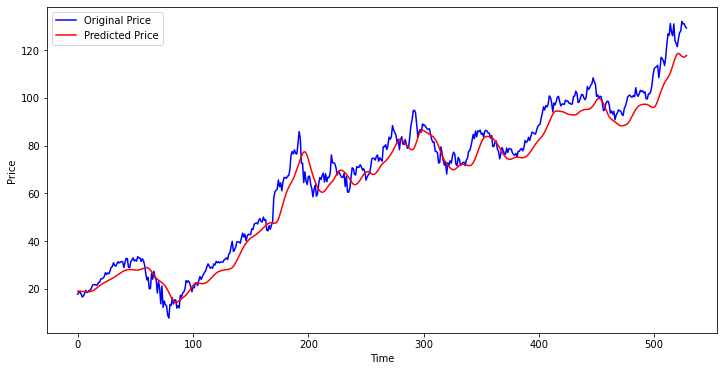

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()